In [5]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Datasets
path = "./datasets/accepted_2007_to_2018Q4.csv"
dataset_accept = pd.read_csv(path)

/var/folders/v0/9xd212bx5wq454d4gnddf1rm0000gn/T/ipykernel_15097/4056628032.py:3: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_accept = pd.read_csv(path)


In [7]:
#dropping columns that have more than 30% of null values
limitPer = len(dataset_accept) * .70
dataset = dataset_accept.dropna(thresh=limitPer, axis=1)


In [8]:
dataset["loan_status"].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [9]:
#Take rows that loan_status is equal to "Fully Paid" or "Charged Off"
dataset = dataset[(dataset["loan_status"] == "Fully Paid") | (dataset["loan_status"] == "Charged Off")]
dataset.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'a

<Axes: xlabel='loan_amnt', ylabel='Count'>

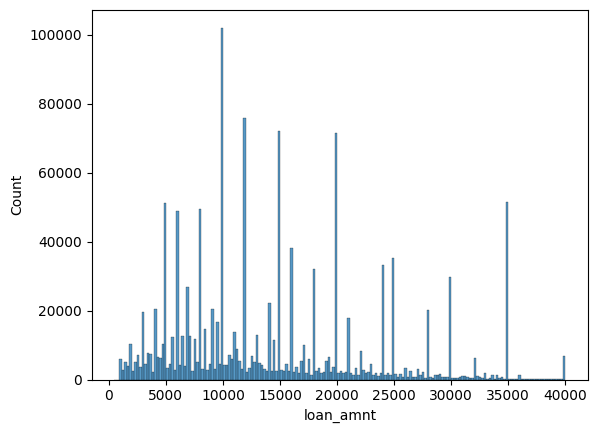

In [10]:
sns.histplot(dataset["loan_amnt"])

In [11]:
#Top 5 columns with highest count of 0 rows
dataset[dataset == 0].count(axis=0).sort_values(ascending = False).head(5)

out_prncp                   1345310
out_prncp_inv               1345310
delinq_amnt                 1340311
acc_now_delinq              1338972
chargeoff_within_12_mths    1334414
dtype: int64

In [12]:
#remove rows with more than 30% of 0 values
dataset = dataset.loc[:, 0.7 > (dataset==0).mean()]

In [13]:
#drop columns unnecessary for the model
dataset = dataset.drop(["id","url"], axis = 1)

In [14]:
dataset_num = dataset.select_dtypes(include="number")
dataset_num.isna().sum().sort_values()

loan_amnt                          0
policy_code                        0
last_fico_range_low                0
last_fico_range_high               0
total_rec_int                      0
total_rec_prncp                    0
total_pymnt_inv                    0
total_pymnt                        0
total_acc                          0
revol_bal                          0
last_pymnt_amnt                    0
fico_range_high                    0
fico_range_low                     0
annual_inc                         0
installment                        0
int_rate                           0
funded_amnt_inv                    0
funded_amnt                        0
open_acc                           0
inq_last_6mths                     1
dti                              374
revol_util                       857
mort_acc                       47281
total_bc_limit                 47281
acc_open_past_24mths           47281
total_bal_ex_mort              47281
num_sats                       55841
n

In [16]:
#number of columns after dropping columns with more than 30% of 0s and null values
len(dataset.columns)

73

In [16]:
dataset["term_in_months"] = dataset["term"].str.extract('(\d+)')
dataset["emp_length_in_years"] = dataset["emp_length"].str.extract('(\d+)')

In [17]:
dataset = dataset.drop(["term", "emp_length"], axis = 1)

In [18]:
dataset.groupby('term_in_months')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term_in_months
36    0.159934
60    0.324454
Name: proportion, dtype: float64

In [21]:
dataset.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'policy_code', 'application_type', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_actv_bc_tl', 'num_actv_rev_t

In [34]:
#correlation only takes numeric data
numeric_data = dataset.select_dtypes(include='number')
#add a numeric category of loan status where 1 if 'Fully Paid' and 0 if 'Charged Off'
numeric_data['loan_status_num'] = dataset['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
data_corr = numeric_data.corr()

In [32]:
data_corr["loan_status_num"].sort_values(ascending = False).head(10)

loan_status_num         1.000000
last_fico_range_high    0.667842
last_fico_range_low     0.575706
total_rec_prncp         0.438944
last_pymnt_amnt         0.347385
total_pymnt             0.315180
total_pymnt_inv         0.314751
fico_range_low          0.130683
fico_range_high         0.130682
bc_open_to_buy          0.082044
Name: loan_status_num, dtype: float64

In [33]:
#drop policy_code since correlation is null 
dataset.drop(["funded_amnt", "funded_amnt_inv", "total_pymnt_inv",'fico_range_low', 'title', 'zip_code', 'application_type','grade', "policy_code"], axis = 1)

,loan_amnt,int_rate,installment,sub_grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,term_in_months,emp_length_in_years
0,3600.0,13.99,123.03,C4,leadman,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,...,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,36,10
1,24700.0,11.99,820.28,C1,Engineer,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,...,7.7,314017.0,39475.0,79300.0,24667.0,N,Cash,N,36,10
2,20000.0,10.78,432.66,B4,truck driver,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,...,50.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,60,10
4,10400.0,22.45,289.91,F1,Contract Specialist,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,...,60.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,60,3
5,11950.0,13.44,405.18,C3,Veterinary Tecnician,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,...,100.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N,36,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,18000.0,9.49,377.95,B2,NaN,OWN,130000.0,Not Verified,Oct-2016,Fully Paid,...,33.3,275356.0,54349.0,13100.0,77756.0,N,Cash,N,60,5
2260690,29400.0,13.99,683.94,C3,Chief Operating Officer,MORTGAGE,180792.0,Not Verified,Oct-2016,Fully Paid,...,42.9,719056.0,148305.0,56500.0,95702.0,N,Cash,N,60,9
2260691,32000.0,14.49,752.74,C4,Sales Manager,MORTGAGE,157000.0,Source Verified,Oct-2016,Charged Off,...,0.0,524379.0,122872.0,15800.0,23879.0,N,Cash,N,60,3
2260692,16000.0,12.79,362.34,C1,Manager,RENT,150000.0,Not Verified,Oct-2016,Fully Paid,...,50.0,87473.0,65797.0,10100.0,73473.0,N,Cash,N,60,10


In [138]:
dataset["avg_fico_range"] = dataset.loc[:, ["last_fico_range_high", "last_fico_range_low"]].mean(axis = 1)

In [139]:
#'loan_amnt', 'funded_amnt', and 'funded_amnt_inv' have high correlation, so I dropped ["funded_amnt", "funded_amnt_inv"] 
# to avoid multicollinearity

In [140]:
# features_to_use = ["loan_status","loan_amnt","int_rate", 'sub_grade', "installment"
# , "home_ownership", "annual_inc", "fico_range_high", "purpose", "term_in_months", "revol_bal"]
features_to_use = ["loan_status","avg_fico_range"
, "total_rec_prncp", "last_pymnt_amnt", "grade", "home_ownership"]

# "last_fico_range_high", "last_fico_range_low"

In [141]:
features_selected_dataset = dataset.loc[:, features_to_use]

In [142]:
features_selected_dataset.isna().sum()

loan_status        0
avg_fico_range     0
total_rec_prncp    0
last_pymnt_amnt    0
grade              0
home_ownership     0
dtype: int64

<Axes: >

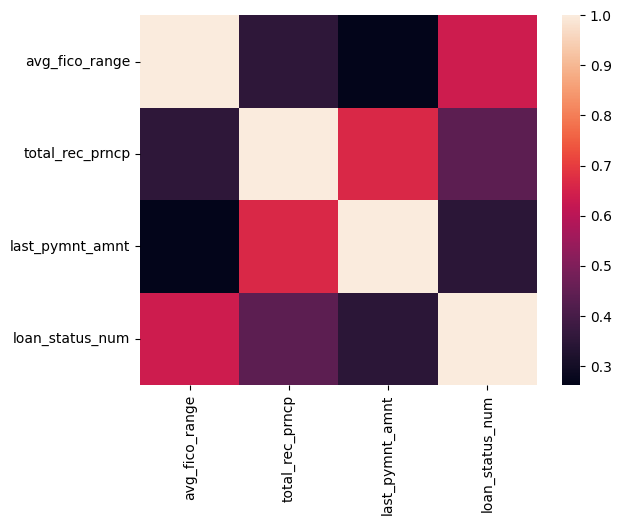

In [143]:
#correlation only takes numeric data
numeric_data = features_selected_dataset.select_dtypes(include='number')
#add a numeric category of loan status where 1 if 'Fully Paid' and 0 if 'Charged Off'
numeric_data['loan_status_num'] = features_selected_dataset['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
data_corr = numeric_data.corr()
sns.heatmap(data_corr)

In [144]:
def log_transform(data, col):
    """Add the log transformation of a column to the data frame"""
    data['Log ' + col] = np.log(data[col]+1)
    return data

In [145]:
#Columns with highest correlation to loan_status 
data_corr['loan_status_num'].sort_values(ascending = False)

loan_status_num    1.000000
avg_fico_range     0.636838
total_rec_prncp    0.438944
last_pymnt_amnt    0.347385
Name: loan_status_num, dtype: float64

In [146]:
#One Hot Encoding Categorical Variables 
features_selected_dataset["loan_status"] = features_selected_dataset['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
# features_selected_dataset = pd.get_dummies(features_selected_dataset, drop_first=True)

In [147]:
features_selected_dataset["home_ownership"].value_counts()

home_ownership
MORTGAGE    665579
RENT        534421
OWN         144832
ANY            286
OTHER          144
NONE            48
Name: count, dtype: int64

In [148]:
features_selected_dataset.groupby("home_ownership")["loan_status"].value_counts(normalize=True)

home_ownership  loan_status
ANY             1              0.804196
                0              0.195804
MORTGAGE        1              0.827923
                0              0.172077
NONE            1              0.854167
                0              0.145833
OTHER           1              0.812500
                0              0.187500
OWN             1              0.793802
                0              0.206198
RENT            1              0.767835
                0              0.232165
Name: proportion, dtype: float64

In [149]:
features_selected_dataset["home_ownership"] = features_selected_dataset['home_ownership'].replace({'NONE': 'OTHER', 'ANY': 'OTHER'})

In [151]:
ohe_dataset = pd.get_dummies(features_selected_dataset, drop_first = True)

In [152]:
ohe_dataset.corr()["loan_status"].sort_values(ascending = False)

loan_status             1.000000
avg_fico_range          0.636838
total_rec_prncp         0.438944
last_pymnt_amnt         0.347385
grade_B                 0.105659
home_ownership_OTHER    0.000535
home_ownership_OWN     -0.005710
grade_C                -0.039001
grade_G                -0.061988
home_ownership_RENT    -0.066086
grade_F                -0.098656
grade_D                -0.109235
grade_E                -0.126706
Name: loan_status, dtype: float64

X

In [153]:
# ohe_dataset = ohe_dataset.loc[:,["loan_status","Log_annual_inc","fico_range_high", "grade_B", "home_ownership_MORTGAGE"]]

In [162]:
X = ohe_dataset.drop('loan_status', axis=1)
y = ohe_dataset['loan_status']

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [177]:
#Baseline Accuracy
print(sum(y_test)/len(y_test))

0.8010059623428606


In [171]:
scale = MinMaxScaler()

X_train= scale.fit_transform(X_train)
X_test = scale.transform(X_test)

Random Forest Classifier

In [172]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [173]:
y_pred_test = rf.predict(X_test)

In [174]:
accuracy_score(y_test, y_pred_test)

0.97648174468919

In [131]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.00
